Retail location problem: Starbucks in NYC.
In the project I will maximize the profits of the new Starbucks stores in New York City.

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
from gurobipy import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
starbucks = pd.read_csv('StarbucksNYC.csv')
starbucks

,LATITUDE,LONGITUDE,ID,percapitai
0,40.704350,-74.013016,1,116523
1,40.704548,-74.009186,2,89244
2,40.708740,-74.009506,3,84091
3,40.709644,-74.014610,4,96825
4,40.710354,-74.007942,5,75487
5,40.711838,-74.006844,6,73044
6,40.713779,-74.009125,7,183591
7,40.715534,-74.009033,8,183591
8,40.718330,-74.000015,9,106335
9,40.719322,-73.989952,10,35524


In [3]:
from shapely.geometry import Point
starbucks['location'] = starbucks.apply(lambda x: Point(x['LONGITUDE'],x['LATITUDE']),axis=1)
geo_starbucks = gpd.GeoDataFrame(starbucks).set_geometry('location')
geo_starbucks
existing_locs = [(geo_starbucks['location'].values[i].y,geo_starbucks['location'].values[i].x) 
                  for i in range(len(starbucks))]
len(existing_locs)

254

A strategy of setting up new stores is to place it next to its competitor. In this case, the proposed Starbucks stores should be placed next to Dunkin'Donuts stores. To simplify the optimization problem, I use the locations of existing Dunkin' Donuts store as potential locations for Starbucks. (New starbucks are to be placed next to those potential locations)

In [4]:
dunkin = pd.read_csv('allDunkinNYC.csv')
len(dunkin)

446

In [5]:
dunkin['location'] = dunkin.apply(lambda x: Point(x['Longitude'],x['Latitude']),axis=1)
geo_dunkin = gpd.GeoDataFrame(dunkin).set_geometry('location')
potential_locs = [(geo_dunkin['location'].values[i].y,geo_dunkin['location'].values[i].x)
                  for i in range(len(dunkin))]
potential_locs

[(40.75974, -73.96518),
 (40.75768, -73.96338),
 (40.750209999999996, -73.97171999999999),
 (40.75758, -73.96937),
 (40.758179999999996, -73.97053000000001),
 (40.759209999999996, -73.97058),
 (40.76027, -73.97601999999999),
 (40.76212, -73.97598),
 (40.80137, -73.94814000000001),
 (40.807990000000004, -73.95258000000001),
 (40.8081, -73.9457),
 (40.804809999999996, -73.93692),
 (40.80336, -73.9345),
 (40.82347, -73.94485999999999),
 (40.82301, -73.9418),
 (40.82059, -73.93658),
 (40.839459999999995, -73.93744000000001),
 (40.83555, -73.92105),
 (40.8549, -73.92984),
 (40.85338, -73.93428),
 (40.850629999999995, -73.93727),
 (40.84918, -73.93383),
 (40.75578, -73.97874),
 (40.75844, -73.97899),
 (40.76141, -73.98431),
 (40.76695, -73.98289),
 (40.75546, -73.98966999999999),
 (40.753679999999996, -73.9911),
 (40.75374, -73.99254),
 (40.78313, -73.95312),
 (40.769870000000004, -73.95174),
 (40.7903, -73.97464000000001),
 (40.79495, -73.97124000000001),
 (40.77752, -73.95034),
 (40.79231,

I use ACS 2016 Census Tract as my data source. 

In [6]:
ctnyc = gpd.read_file('NYC.shp')
ctnyc

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,INTPTLON,pop_p,median_inc,m_gross_re,NUMPOINTS,percapitai,median_con,NYCcentroi,NYCcentr_1,geometry
0,36,061,008603,36061008603,86.03,Census Tract 86.03,G5020,S,116670,153941,...,-073.9617418,4062,144963,2628,0,166371,2340,+40.7525143,-073.9617418,(POLYGON ((-73.96120516650947 40.7504000812001...
1,36,061,010800,36061010800,108,Census Tract 108,G5020,S,182589,0,...,-073.9654530,9032,124740,2248,0,121773,2117,+40.7589685,-073.9654530,"POLYGON ((-73.96848 40.75895, -73.968024 40.75..."
2,36,061,009000,36061009000,90,Census Tract 90,G5020,S,174692,0,...,-073.9700939,7760,130232,2304,1,107607,2214,+40.7526586,-073.9700939,"POLYGON ((-73.973045 40.752692, -73.972588 40...."
3,36,061,009200,36061009200,92,Census Tract 92,G5020,S,197023,0,...,-073.9747422,1701,120769,2601,5,110887,2525,+40.7536476,-073.9747422,"POLYGON ((-73.977875 40.753099, -73.9774319999..."
4,36,061,009800,36061009800,98,Census Tract 98,G5020,S,177068,0,...,-073.9677745,7284,127573,2366,1,115639,2258,+40.7557880,-073.9677745,"POLYGON ((-73.97096499999999 40.75554, -73.970..."
5,36,061,010000,36061010000,100,Census Tract 100,G5020,S,172894,0,...,-073.9712318,1776,91827,2372,4,100738,2336,+40.7580653,-073.9712318,"POLYGON ((-73.97398199999999 40.75718, -73.973..."
6,36,061,011203,36061011203,112.03,Census Tract 112.03,G5020,S,77947,0,...,-073.9689142,1206,116250,2778,3,134173,2758,+40.7612444,-073.9689142,"POLYGON ((-73.97075 40.76160900000001, -73.970..."
7,36,061,010200,36061010200,102,Census Tract 102,G5020,S,172891,0,...,-073.9744493,180,165083,2972,6,78950,2946,+40.7594238,-073.9744493,"POLYGON ((-73.97720099999999 40.758538, -73.97..."
8,36,061,019800,36061019800,198,Census Tract 198,G5020,S,225452,0,...,-073.9423627,2824,75945,1304,0,42821,1130,+40.8043025,-073.9423627,POLYGON ((-73.94569299999999 40.80451499999999...
9,36,061,019000,36061019000,190,Census Tract 190,G5020,S,103802,0,...,-073.9476194,3260,60509,789,0,46127,694,+40.8019616,-073.9476194,"POLYGON ((-73.94968 40.802024, -73.94918699999..."


Now visualize the existing Starbucks stores and the potential locations. 

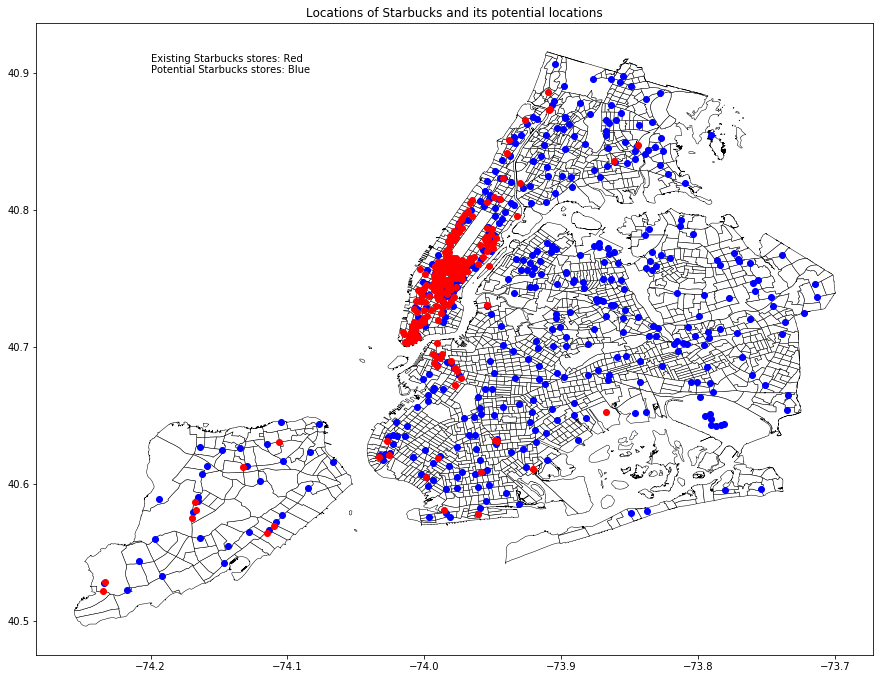

In [7]:
ax = ctnyc.plot(color='white',edgecolor='black',linewidth=0.5,figsize=(15,15));
geo_dunkin.plot(ax=ax, color='blue')
geo_starbucks.plot(ax=ax, color='red')
ax.text(-74.2,40.9,'Existing Starbucks stores: Red\nPotential Starbucks stores: Blue')
ax.set_title('Locations of Starbucks and its potential locations');

The new Starbucks stores can be set in the potential locations. 
Now create the list of populations Po and per capita income Ro. 

In [8]:
NYC = pd.read_csv('NYC.csv')
Po = [NYC['population'][i] for i in range(len(NYC))]
Ro = [NYC['per_capita_I'][i] for i in range(len(NYC))]


Suppose Starbucks would prefer locations with higher income.
Find the minimum per capita income of the Starbucks-covered neighborhoods.

In [9]:
starbucks['percapitai'].min()

15387

In [10]:
#also get the list of centroid coordinates 
NYC['location'] = NYC.apply(lambda x: Point(x['Cenlon'],x['Cenlat']),axis=1)
geo_centroid = gpd.GeoDataFrame(NYC).set_geometry('location')
centroid_locs = [(geo_centroid['location'].values[i].y,geo_centroid['location'].values[i].x)
                  for i in range(len(NYC))]
centroid_locs

[(40.7929362, -73.88120649999999),
 (40.7910329, -73.9200395),
 (40.781317200000004, -73.9668472),
 (40.9138727, -73.9111066),
 (40.8618648, -73.8853878),
 (40.696965999999996, -73.945154),
 (40.6573033, -73.9394864),
 (40.7061438, -73.9612198),
 (40.6355984, -74.1189103),
 (40.8260067, -73.887962),
 (40.7032772, -73.95056459999999),
 (40.8342262, -73.9053292),
 (40.700298100000005, -73.9599546),
 (40.696738399999994, -73.95674040000002),
 (40.665129, -73.9076346),
 (40.701409600000005, -73.9470079),
 (40.8434761, -73.8723188),
 (40.836535, -73.9043915),
 (40.805060600000004, -73.9163335),
 (40.8514336, -73.9226455),
 (40.808669, -73.9615617),
 (40.6973922, -73.95128620000001),
 (40.806449, -73.91377290000001),
 (40.8226294, -73.89873399999999),
 (40.840480799999995, -73.9021708),
 (40.8146752, -73.909389),
 (40.6701302, -73.90885949999999),
 (40.88586110000001, -73.8452028),
 (40.831511, -73.90703149999999),
 (40.66777929999999, -73.8996082),
 (40.8082418, -73.9119436),
 (40.6036722, 

For each census tract, find the stores that lie within the 1.61 km serving distance(including the existing starbucks and the proposed ones). 
suppose the population of each census tract is concentrated in the centroid. 
First compute the distance matrix D, 
each row represents one centroid
column 1~446(the length of potential_locs) represents each potential location
column 447~700(the length of existing_locs) represents each existing Starbucks stores
each dij represents the halversine distance of centroid i to the store j. 

Then, compute the second matrix N. N is a binary matrix. 
select the stores within radius S to each centroid i. 
For each Nij, if store j is within two blocks away(1.61 km) from the centroid, Nij=1, or else it's 0. 

In [11]:
#put the two list together to make it easier to compute matrix
total_locs = potential_locs + existing_locs
len(total_locs)

700

In [12]:
class Haversine:
    '''
    use the haversine class to calculate the distance between
    two lon/lat coordnate pairs.
    output distance available in kilometers, meters, miles, and feet.
    example usage: Haversine([lon1,lat1],[lon2,lat2]).feet
    
    '''
    def __init__(self,coord1,coord2):
        lon1,lat1=coord1
        lon2,lat2=coord2
        
        R=6371000                               # radius of Earth in meters
        phi_1=math.radians(lat1)
        phi_2=math.radians(lat2)

        delta_phi=math.radians(lat2-lat1)
        delta_lambda=math.radians(lon2-lon1)

        a=math.sin(delta_phi/2.0)**2+\
           math.cos(phi_1)*math.cos(phi_2)*\
           math.sin(delta_lambda/2.0)**2
        c=2*math.atan2(math.sqrt(a),math.sqrt(1-a))
        
        self.meters=R*c                         # output distance in meters
        self.km=self.meters/1000.0              # output distance in kilometers
        self.miles=self.meters*0.000621371      # output distance in miles
        self.feet=self.miles*5280               # output distance in feet


if __name__ == "__Haversine__":
    main()

In [13]:
import math
from math import radians, cos, sin, asin, sqrt

D = []
for i in range(len(centroid_locs)):
    x = []
    n = 1
    for j in range(len(total_locs)):
        d = Haversine(centroid_locs[i],total_locs[j]).km
        x.append(d)
        n+=1
        if n == 701:
            D.append(x)
            break
    
D=np.matrix(D)
D

matrix([[ 9.39321221,  9.20155107, 10.15023505, ...,  3.93710171,
          3.92515417,  4.29330917],
        [ 5.11083663,  4.92722317,  5.88212103, ...,  2.82760314,
          2.84738965,  3.12623258],
        [ 0.68813928,  0.8220231 ,  1.09817612, ...,  7.05402193,
          7.07988401,  7.09382962],
        ...,
        [ 1.74949166,  1.94700191,  1.03663955, ...,  8.79148532,
          8.81734538,  8.83239353],
        [ 0.77791452,  0.98475701,  0.38325458, ...,  7.82829073,
          7.85413022,  7.88201107],
        [ 0.68145248,  0.63995152,  1.41462256, ...,  6.56146759,
          6.58728463,  6.6241631 ]])

In [14]:
D.shape

(2122, 700)

Compute the probability matrix I

In [15]:
from geopy.distance import great_circle
S = 1.61
N =np.zeros((2122,700))
Io =np.zeros((2122,700))
I =np.zeros((2122,700))

for i in range(2122):
    row = np.array(D[i,:])
    indice = np.argwhere(row <= S)
    idx = indice[:,1].tolist()
    for k in range(len(idx)):
        one = idx[k]
        N[i,one]=1
        Io[i,one]=(1/D[i,one]**2)
        
N = np.matrix(N)

for i in range(2122):
    SUM = np.sum(np.array(Io[i]).flatten())   #normalization
    for j in range(700):
        if SUM > 0:
            I[i,j]= Io[i,j]/SUM  

I = np.matrix(I)

In [16]:
I[1]

matrix([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.02425868, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.03986045,
         0.        , 0.18627149, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0

In [17]:
Ro

[2332,
 4583,
 5860,
 6709,
 6995,
 7082,
 7145,
 7661,
 8048,
 8157,
 8290,
 8551,
 8603,
 8710,
 8854,
 8966,
 9371,
 9451,
 9503,
 9606,
 9733,
 9776,
 9800,
 9800,
 9809,
 9814,
 9857,
 9867,
 9886,
 10077,
 10112,
 10159,
 10250,
 10285,
 10366,
 10390,
 10423,
 10552,
 10652,
 10704,
 10716,
 10730,
 10797,
 10799,
 10831,
 10931,
 10937,
 10939,
 10982,
 10996,
 11066,
 11119,
 11242,
 11267,
 11278,
 11285,
 11316,
 11321,
 11332,
 11348,
 11375,
 11397,
 11409,
 11418,
 11427,
 11489,
 11560,
 11631,
 11667,
 11675,
 11702,
 11703,
 11711,
 11737,
 11772,
 11792,
 11901,
 11904,
 11955,
 11959,
 11974,
 11988,
 12001,
 12020,
 12048,
 12064,
 12079,
 12111,
 12114,
 12122,
 12131,
 12133,
 12172,
 12254,
 12285,
 12304,
 12315,
 12336,
 12359,
 12400,
 12420,
 12441,
 12507,
 12510,
 12514,
 12516,
 12517,
 12529,
 12550,
 12568,
 12587,
 12604,
 12624,
 12663,
 12690,
 12702,
 12733,
 12805,
 12806,
 12814,
 12824,
 12847,
 12851,
 12862,
 12878,
 12887,
 12888,
 12917,
 1291

In [18]:
P = 24 #total number of proposed starbucks stores

model = Model('Starbucks allocation')
model.setParam('TimeLimit', 300)

#Decision variables
print('creating vars')
new_stores = model.addVars(range(len(potential_locs)), name='x', vtype=GRB.BINARY)


#Constraints
print('creating cons')
model.addConstr((sum([new_stores[i] for i in range(len(potential_locs))]) == P),'capacity')
#model.addConstrs((new_stores[j]*N[i,j]*Ro[i]>=15387 for i in range(len(centroid_locs)) for j in range(len(potential_locs)) if new_stores[j]*N[i,j]==1),'defining')

print('setting obj')
model.setObjective(sum([new_stores[j]*Po[i]*I[i,j]*Ro[i] for i in range(len(Po)) for j in range(len(new_stores))]),GRB.MAXIMIZE)
                 
                  
print('solving')
model.optimize()

Academic license - for non-commercial use only
Changed value of parameter TimeLimit to 300.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
creating vars
creating cons
setting obj
solving
Optimize a model with 1 rows, 446 columns and 446 nonzeros
Variable types: 0 continuous, 446 integer (446 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+07, 2e+09]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+01, 2e+01]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Found heuristic solution: objective 9.908415e+09
Presolve time: 0.01s
Presolved: 1 rows, 446 columns, 446 nonzeros
Variable types: 0 continuous, 446 integer (446 binary)

Root relaxation: objective 2.482563e+10, 1 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0  

In [19]:
print('Optimal selection')
print('List of selected locations')
selected_stores_locs = []
locs_idx=[]
for v in model.getVars():
    if v.x != 0:
        if v.varName[0] == 'x':
            j = int(v.varName[2:-1])
            locs_idx.append(j)
            print(j)
            selected_stores_locs.append(Point(potential_locs[j][1],potential_locs[j][0])) # (long,lat)

Optimal selection
List of selected locations
0
35
39
120
134
135
138
140
142
145
149
150
163
178
240
241
274
285
291
345
370
405
437
442


In [20]:
selected_stores_locs

In [21]:
Rj=[]
for j in range(len(locs_idx)):
    for i in range(2122):
        if N[:,[locs_idx[j]]][i].tolist()[0][0]==1.0:
            r=Ro[i]
            Rj.append(r) 
Rj            

[5860,
 9733,
 10366,
 12568,
 20751,
 22150,
 26403,
 31809,
 33837,
 35302,
 40713,
 41363,
 43127,
 44282,
 44800,
 50080,
 52032,
 52616,
 53831,
 57544,
 59579,
 66093,
 67636,
 69844,
 73132,
 74463,
 75424,
 75589,
 76984,
 78850,
 78950,
 80587,
 81316,
 84098,
 88209,
 88552,
 89001,
 89091,
 89902,
 90505,
 93157,
 93763,
 95786,
 97600,
 99459,
 100738,
 100825,
 101676,
 102328,
 106822,
 107607,
 108412,
 110887,
 114483,
 115639,
 119527,
 120892,
 121773,
 127647,
 133222,
 133277,
 134173,
 134531,
 134936,
 136632,
 148842,
 152826,
 157637,
 158790,
 161027,
 161702,
 166371,
 182587,
 192858,
 194869,
 220211,
 227095,
 5860,
 9733,
 13763,
 16281,
 18331,
 19605,
 21751,
 26403,
 31809,
 33837,
 35036,
 37088,
 43127,
 44716,
 45796,
 46104,
 50080,
 67636,
 73132,
 74463,
 75424,
 75589,
 75717,
 78850,
 78950,
 79814,
 84098,
 88209,
 89001,
 89091,
 90505,
 91518,
 93157,
 93763,
 95786,
 97600,
 99061,
 99459,
 100738,
 106822,
 107607,
 108412,
 110887,
 114483

In [22]:
Rj=np.array(Rj)
mean_chosen=Rj.mean()
print(mean_chosen)
Ro=np.array(Ro)
mean_all=Ro.mean()
print(mean_all)

41471.377405032064
33248.55560791706


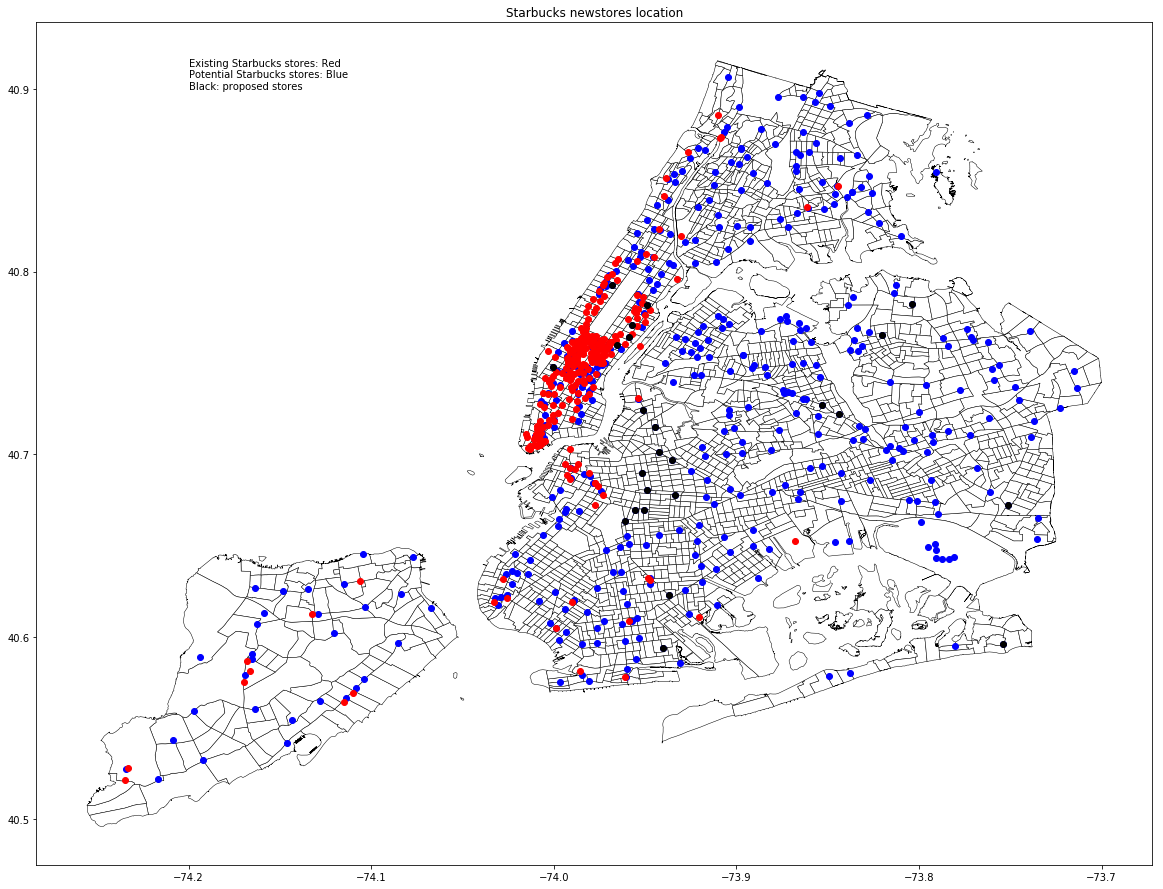

In [23]:
ax = ctnyc.plot(color='white',edgecolor='black',linewidth=0.5,figsize=(20,20));
solution_locations = gpd.GeoDataFrame(selected_stores_locs,columns=['geometry'])
geo_dunkin.plot(ax=ax, color='blue')
geo_starbucks.plot(ax=ax, color='red')
ax.set_title('Starbucks newstores location')
ax.text(-74.2,40.9,'Existing Starbucks stores: Red\nPotential Starbucks stores: Blue\nBlack: proposed stores')
solution_locations.plot(ax=ax, color='black')